In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
with open('normal1.txt') as fin:
    data = fin.read()
normal_sample_1 = [float(number) for number in data.split()]
with open('normal2.txt') as fin:
    data = fin.read()
normal_sample_2 = [float(number) for number in data.split()]
normal_sample = normal_sample_1 + normal_sample_2
with open('uniform.txt') as fin:
    data = fin.read()
uniform_sample = [float(number) for number in data.split()]

In [3]:
true_mean = 0
true_var = 0.7

# 1. Доверительные интервалы

In [4]:
n = len(normal_sample)
X = sps.describe(normal_sample).mean
S0 = sps.describe(normal_sample).variance # describe() calculates unbiased sample variance
S1 = 0
for i in range(n):
    S1 += (normal_sample[i] - true_mean) ** 2 / n
print('Выборочное среднее: %.3f' % X)
print('Несмещенная выборочная дисперсия: %.3f' % S0)
print('Выборочная дисперсия при известном среднем: %.3f' % S1)

print('\nУровень доверия: ', end = '')
e = 1 - float(input())

right_quantile = sps.norm(0, 1).ppf(1 - e / 2) # ppf(q) is q-quantile
left = X - np.sqrt(true_var) * right_quantile / np.sqrt(n)
right = X + np.sqrt(true_var) * right_quantile / np.sqrt(n)
print('ДИ для среднего при известной дисперсии: (%.3f, %.3f)' % (left, right))

left_quantile = sps.chi2(n).ppf(e / 2)
right_qantile = sps.chi2(n).ppf(1 - e / 2)
left = n * S1 / right_qantile
right = n * S1 / left_quantile
print('ДИ для дисперсии при известном среднем: (%.3f, %.3f)' % (left, right))

right_qantile = sps.t(n).ppf(1 - e / 2) # t is Student's t-distribution
left = X - np.sqrt(S0) * right_quantile / np.sqrt(n)
right = X + np.sqrt(S0) * right_quantile / np.sqrt(n)
print('ДИ для среднего при неизвестной дисперсии: (%.3f, %.3f)' % (left, right))

left_quantile = sps.chi2(n - 1).ppf(e / 2)
right_qantile = sps.chi2(n - 1).ppf(1 - e / 2)
left = (n - 1) * S0 / right_qantile
right = (n - 1) * S0 / left_quantile
print('ДИ для дисперсии при неизвестном среднем: (%.3f, %.3f)' % (left, right))

Выборочное среднее: -0.129
Несмещенная выборочная дисперсия: 0.733
Выборочная дисперсия при известном среднем: 0.735

Уровень доверия: 0.05
ДИ для среднего при известной дисперсии: (-0.136, -0.121)
ДИ для дисперсии при известном среднем: (0.736, 0.755)
ДИ для среднего при неизвестной дисперсии: (-0.136, -0.121)
ДИ для дисперсии при неизвестном среднем: (0.734, 0.753)


# 2.1. График эмпирической функции распределения и гистограмма

[0.008, 0.034, 0.051, 0.068, 0.08, 0.135, 0.164, 0.224, 0.291, 0.345, 0.358, 0.377, 0.38, 0.405, 0.481, 0.596, 0.612, 0.679, 0.708, 0.768, 0.777, 0.78, 0.815, 0.843, 0.917, 0.922, 0.934, 0.946, 0.977, 0.994]


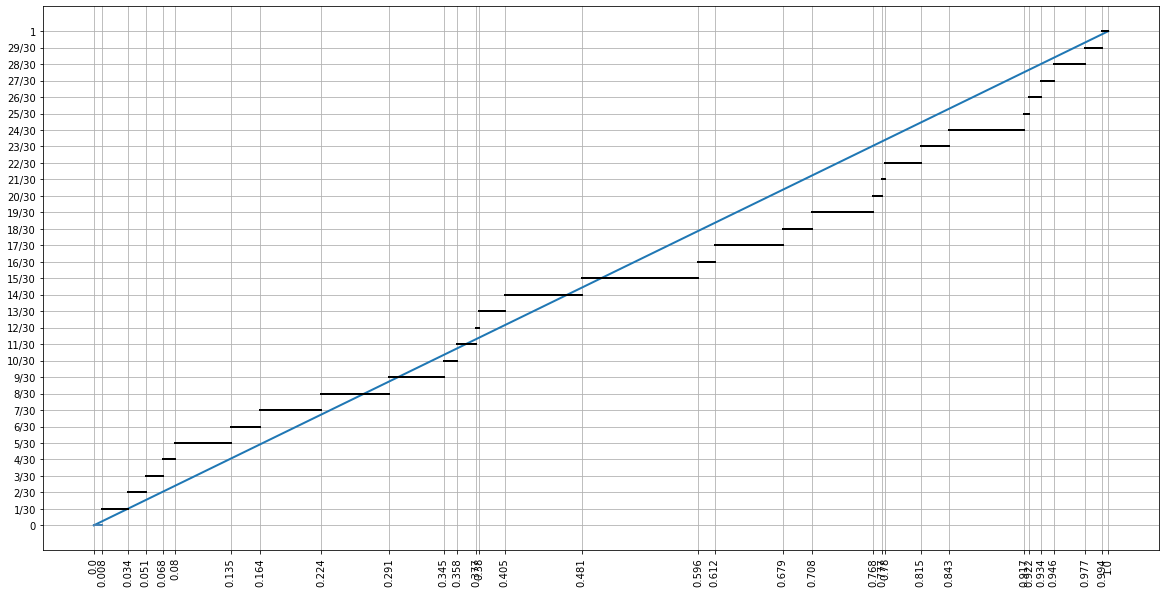

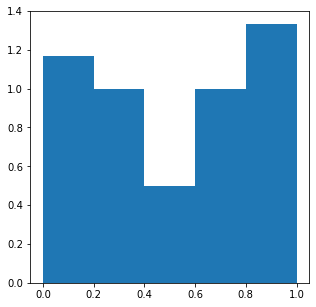

In [5]:
n = len(uniform_sample)
ordered_uniform_sample = sorted(uniform_sample)
print(ordered_uniform_sample)

plt.figure(figsize = (20, 10))
ax = plt.axes()
plt.plot([0, 1], [0, 1], linewidth = 2)
plt.plot([0, ordered_uniform_sample[0]], [0, 0], color = 'steelblue', linewidth = 2)
for i in range(n):
    j = i + 1
    while j < n and ordered_uniform_sample[j] == ordered_uniform_sample[i]: j += 1
    if j < n: 
        left = ordered_uniform_sample[i]
        right = ordered_uniform_sample[j]
        val = (i + 1) / n
        plt.plot([left, right], [val, val], color = 'black', linewidth = 2)
plt.plot([ordered_uniform_sample[n - 1], 1], [1, 1], color = 'black', linewidth = 2)
ax.set_xticks([0] + ordered_uniform_sample + [1])
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.set_yticks([i / n for i in range(n + 1)])
ax.set_yticklabels(['0'] + [str(i) + '/' + str(n) for i in range(1, n)] + ['1'])
plt.grid(True)
plt.show()

m = 1 + int(np.log(n)/np.log(2))
plt.figure(figsize = (5, 5))
ax = plt.axes()
plt.hist(uniform_sample, bins = [i / m for i in range(0, m + 1)], density = True)
ax.set_xticks([i / m for i in range(0, m + 1)])
plt.show()

# 2.2. Проверка гипотезы о равномерности

In [6]:
n = len(uniform_sample)
ordered_uniform_sample = sorted(uniform_sample)
e = 0.1

c_kolm = sps.kstwobign.ppf(1 - e)
d_kolm = np.sqrt(n) * max([max(np.fabs(ordered_uniform_sample[i] - i / n), np.fabs(ordered_uniform_sample[i] - (i + 1) / n)) for i in range(n)])
print('Значения статистики для критерия Колмогорова')
print('Критическое: %.3f' % c_kolm)
print('Достигнутое: %.3f' % d_kolm)

c_chi2 = sps.chi2(2).ppf(1 - e)
n1 = n2 = n3 = 0
for i in range(n):
    if ordered_uniform_sample[i] < 1 / 3: n1 += 1
    elif ordered_uniform_sample[i] > 2 / 3: n3 += 1
    else: n2 += 1 
d_chi2 = 3 / n * ((n1 - n / 3) ** 2 + (n2 - n / 3) ** 2 + (n3 - n / 3) ** 2)
print('\nЗначения статистики для критерия хи-квадрат')
print('Критическое: %.3f' % c_chi2)
print('Достигнутое: %.3f' % d_chi2)

Значения статистики для критерия Колмогорова
Критическое: 1.224
Достигнутое: 0.738

Значения статистики для критерия хи-квадрат
Критическое: 4.605
Достигнутое: 1.400


# 3. Критерии согласия

In [7]:
n = len(normal_sample_1)
m = len(normal_sample_2)
e = 0.1

X_1 = sps.describe(normal_sample_1).mean
S0_1 = sps.describe(normal_sample_1).variance
X_2 = sps.describe(normal_sample_2).mean
S0_2 = sps.describe(normal_sample_2).variance
print('Выборочное среднее первой выборки: %.3f' % X_1)
print('Несмещенная выборочная дисперсия первой выборки: %.3f' % S0_1)
print('Выборочное среднее второй выборки: %.3f' % X_2)
print('Несмещенная выборочная дисперсия второй выборки: %.3f' % S0_2)

F = S0_1 / S0_2
c_var_lower = sps.f(n - 1, m - 1).ppf(e / 2)
c_var_upper = sps.f(n - 1, m - 1).ppf(1 - e / 2)
print('\nЗначения статистики для гипотезы о совпадении дисперсий')
print('Нижнее критическое: %.3f' % c_var_lower)
print('Верхнее критическое: %.3f' % c_var_upper)
print('Достигнутое: %.3f' % F)

T = (X_1 - X_2) / np.sqrt((n - 1) * S0_1 + ((m - 1) * S0_2)) * np.sqrt((m + n - 1) / (1 / m + 1 / n))
c_mean = sps.t(n + m - 2).ppf(1 - e / 2)
print('\nЗначения статистики для гипотезы о совпадении средних')
print('Критическое: %.3f' % c_mean)
print('Достигнутое: %.3f' % T)

Выборочное среднее первой выборки: -0.089
Несмещенная выборочная дисперсия первой выборки: 0.479
Выборочное среднее второй выборки: -0.155
Несмещенная выборочная дисперсия второй выборки: 0.923

Значения статистики для гипотезы о совпадении дисперсий
Нижнее критическое: 0.481
Верхнее критическое: 1.958
Достигнутое: 0.519

Значения статистики для гипотезы о совпадении средних
Критическое: 1.677
Достигнутое: 0.267
